# **IMPORT LIBRARIES**

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# **DATASET**

In [2]:
df=pd.read_csv('../input/data-science-job-salaries/ds_salaries.csv')
data=df.drop(['Unnamed: 0'],axis=1)

In [3]:
data.shape
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

**Data Science Job Salaries Dataset contains 11 columns**

1. work_year : *The year the salary was paid.*

2. experience_level : *The experience level in the job during the year*

3. employment_type : *The type of employment for the role*

4. job_title : *The role worked in during the year.*

5. salary : *The total gross salary amount paid.*

6. salary_currency : *The currency of the salary paid as an ISO 4217 currency code.*

7. salaryinusd : *The salary in USD*

8. employee_residence : *Employee's primary country of residence in during the work year as an ISO 3166 country code.*

9. remote_ratio : *The overall amount of work done remotely*

10. company_location : *The country of the employer's main office or contracting branch*

11. company_size : *The median number of people that worked for the company during the year*

In [4]:
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [6]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# **EXPERIENCE VS SALARY**

In [8]:
data['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

* MI - Mid level
* SE - Senior Executive
* EN - Entry Level
* EX - Executive

In [9]:
data['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [10]:
exp=data['experience_level'].unique()

exp1=data['experience_level'].value_counts()
fig = px.pie(values=exp1, names= exp,title='Experience level',template= 'plotly_dark')

fig.show()

**Insights:** Most of the employees are mid-level and senior executives,So it is very rare to get a job in datascience as entry level

In [11]:
exp_levels=['MI','SE','EN','EX']
MI_salary=data.loc[data['experience_level']==exp_levels[0]]
SE_salary=data.loc[data['experience_level']==exp_levels[1]]
EN_salary=data.loc[data['experience_level']==exp_levels[2]]
EX_salary=data.loc[data['experience_level']==exp_levels[3]]

In [12]:
df = MI_salary
fig = px.bar(df, x='work_year', y='salary_in_usd', color='salary_in_usd',
             title='Mid-level exp salary over the years', height=400,template= 'plotly_dark')
fig.show()

In [13]:
df = SE_salary
fig = px.bar(df, x='work_year', y='salary_in_usd', color='salary_in_usd',
             title='Senior_level exp salary over the years', height=600,template= 'plotly_dark')
fig.show()

In [14]:
df = EN_salary
fig = px.bar(df, x='work_year', y='salary_in_usd', color='salary_in_usd',
             title='Entry-level exp salary over the years', height=600,template= 'plotly_dark')
fig.show()

In [15]:
EX_salary['work_year'].unique()

array([2020, 2021, 2022])

In [16]:
df = EX_salary
fig = px.bar(df, x='work_year', y='salary_in_usd', color='salary_in_usd',
             title='Executive-level exp salary over the years', height=600,template= 'plotly_dark')
fig.show()

**Insights:** With these above four graphs we can cleary understood the salaries differences and raises between experience levels over the few years

# **ROLES VS EXPERIENCES**

In [17]:
MI_data=data.loc[data['experience_level']==exp_levels[0]]
SE_data=data.loc[data['experience_level']==exp_levels[1]]
EN_data=data.loc[data['experience_level']==exp_levels[2]]
EX_data=data.loc[data['experience_level']==exp_levels[3]]


In [18]:
MIexp=MI_data['job_title'].unique()
MIexp1=MI_data['job_title'].value_counts()

In [19]:
SEexp=SE_data['job_title'].unique()
SEexp1=SE_data['job_title'].value_counts()

In [20]:
ENexp=EN_data['job_title'].unique()
ENexp1=EN_data['job_title'].value_counts()

In [21]:
EXexp=EX_data['job_title'].unique()
EXexp1=EX_data['job_title'].value_counts()

In [22]:
import plotly.express as px
data = EX_data
fig = px.bar(data, x= EXexp, y=EXexp1,labels={'x':'roles','y':'counts'},title='Executive_level_exp roles in datascience',template= 'plotly_dark')
fig.show()

In [23]:
import plotly.express as px
data = EN_data
fig = px.bar(data, x= ENexp, y=ENexp1,labels={'x':'roles','y':'counts'},title='Entry_level_exp roles in datascience',template= 'plotly_dark')
fig.show()

In [24]:
import plotly.express as px
data = MI_data
fig = px.bar(data, x= SEexp, y=SEexp1,labels={'x':'roles','y':'counts'},title='Senior_level_exp roles in datascience',template= 'plotly_dark')
fig.show()

In [25]:
import plotly.express as px
data= MI_data
fig = px.bar(data, x= MIexp, y=MIexp1,labels={'x':'roles','y':'counts'},title='Mid_level_exp roles in datascience',template= 'plotly_dark')
fig.show()

**Insights:** We can see that most of the popular roles are Datascientist,Machine learning scientist,Data analyst across experience wise

# **REMOTE VS NON REMOTE**

In [26]:
Remotedata=[0,50,100]
Re_data=data.loc[data['remote_ratio']==Remotedata[2]]

In [27]:
company_loc=Re_data['company_location'].unique()

company_loc1=Re_data['company_location'].value_counts()
fig = px.pie(values=company_loc1, names= company_loc,title='Remote jobs based on company location',template= 'plotly_dark')

fig.show()

**Insights:** Around 51 % company based on US are offering remote jobs for datascience!

In [28]:
Non_Re_data=data.loc[data['remote_ratio']==Remotedata[0]]

In [29]:
company_loc=Non_Re_data['company_location'].unique()

company_loc1=Non_Re_data['company_location'].value_counts()
fig = px.pie(values=company_loc1, names= company_loc,title='Remote jobs based on company location',template= 'plotly_dark')

fig.show()

**Insights:** German based companies are mostly not offering remote jobs,So the candidates have to think before applying for a job in germany.

<AxesSubplot:xlabel='company_location', ylabel='salary_in_usd'>

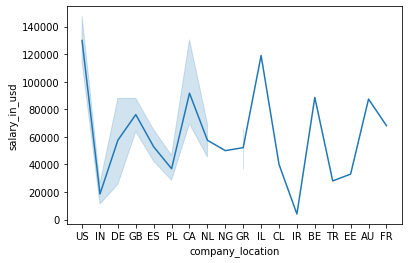

In [30]:
x = Re_data
sns.lineplot(data=x, x="company_location", y="salary_in_usd")

**Insights:** US based remote companies offering more dollars for datascience domains

<AxesSubplot:xlabel='company_location', ylabel='salary_in_usd'>

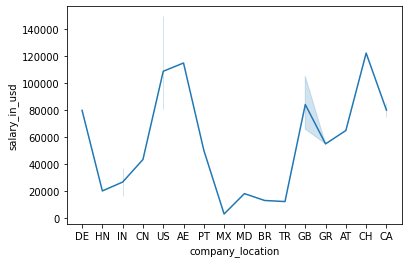

In [31]:
y=Non_Re_data
sns.lineplot(data=y, x="company_location", y="salary_in_usd")

**Insights:** German based companies are offering non_remote jobs,But Giving less dollars compared to US,So choosing US market for remote and non_remote datascience jobs is a best decision

Text(0, 0.5, 'Company_size')

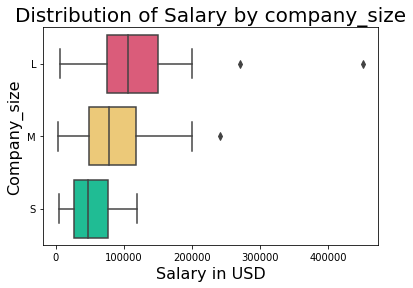

In [32]:
sns.boxplot(y=Re_data['company_size'],
           x=Re_data['salary_in_usd'],
           palette=sns.set_palette(['#ef476f','#ffd166','#06d6a0','#118ab2']))
plt.title('Distribution of Salary by company_size',fontsize=20)
plt.xlabel('Salary in USD',fontsize=16)
plt.ylabel('Company_size',fontsize=16)

**Insights:** Large enterprises in remote offerring more salary for datascience roles,So if you're decided to go remote you should apply for large companies for salary parameters. 

# **ROLES VS SALARIES**

In [33]:
data = data
fig = px.bar(data, x='job_title',y='salary_in_usd',title='Roles in salaries', color='salary_in_usd',template= 'plotly_dark')
fig.show()

**Insights:** Datascientist and data engineer have demand,But Research scientist,Financial analyst and Applied ML scientist has low demand relatively paying good compared to above two!

# **LOCATION VS SALARY OVERALL**

In [34]:
data = data
fig = px.bar(data, x='company_location',y='salary_in_usd',title='Location(overall) in salaries',template= 'plotly_dark')
fig.show()

Text(0.5, 1.0, 'Confusion Matrix')

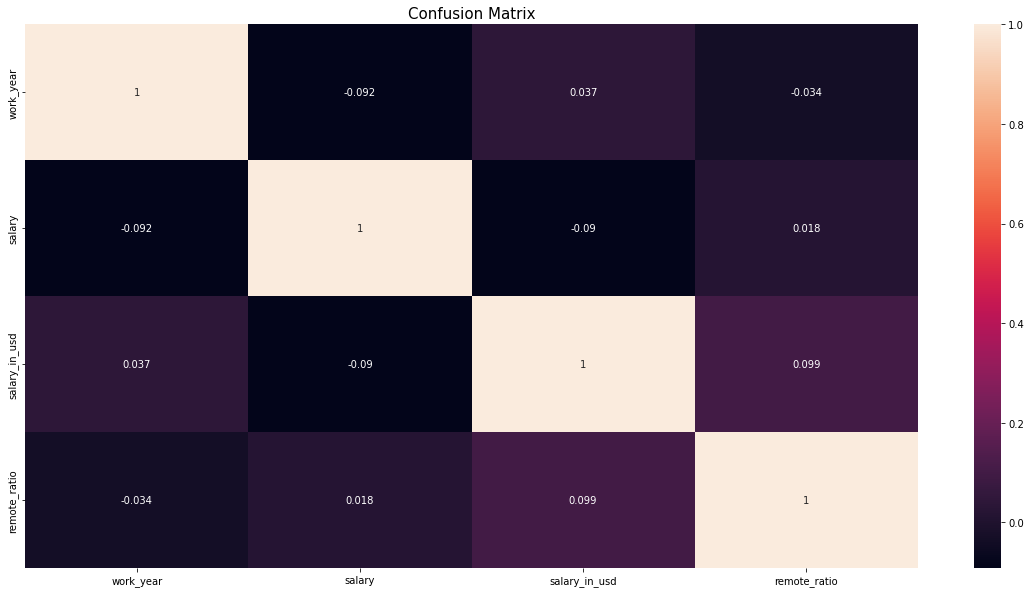

In [35]:
fig, ax = plt.subplots() 
fig.set_size_inches(20,10)
sns.heatmap(data.corr(), annot = True)
plt.title('Confusion Matrix',fontsize=15)

🙇‍♂️I hope you like my insights and explanations,Please Upvote if you like it!♥